<a href="https://colab.research.google.com/github/souvick-mukherjee/imdb_review_sentiment_analysis/blob/main/Movie_review_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Movie Review Sentiment Analysis

This project demonstrates a sentiment analysis on the IMDB movie review dataset using traditional machine learning techniques. The goal is to classify movie reviews as either **positive** or **negative** based on their textual content. We utilize various preprocessing techniques, feature extraction methods, **Naive Bayes** model to predict the sentiment.

**Steps:**
1. Data Import and Exploration
2. Data Preprocessing
3. Feature Extraction using CountVectorizer
4. Model Training (Naive Bayes, Logistic Regression)
5. Model Evaluation using Accuracy and Confusion Matrix


In [ ]:
!pip install nltk seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Import and Exploration

In this step, we load the IMDB movie review dataset into our notebook and explore the structure of the dataset. This includes checking for null values, understanding the distribution of sentiments, and inspecting some sample reviews.


In [ ]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

Preprocessing is a crucial step in any Natural Language Processing (NLP) project. Here, we clean and prepare the movie reviews by:
1. Converting all text to lowercase.
2. Removing common stopwords (e.g., "the", "and", "is") that do not contribute much to the meaning of the reviews.
3. Lemmatizing words, i.e., reducing words to their base form (e.g., "running" to "run").

This ensures that the dataset is in a clean, consistent format that machine learning models can process effectively.


In [ ]:
lemmatizer = WordNetLemmatizer()

# Function to preprocess the reviews
def preprocess_text(text):
    text = text.lower()
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)


In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [ ]:
X = df['review']
y = df['sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Extraction using CountVectorizer

In this step, we convert the preprocessed text reviews into numerical features that machine learning models can understand. We use the **Bag of Words** approach, implemented via **CountVectorizer**, to transform each review into a vector of word counts. This allows us to represent the text data in a numerical format while capturing the frequency of each word.


In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)


## Model Training

Here, we train a machine learning model on the transformed dataset:
1. **Naive Bayes Classifier**: A simple yet effective model for text classification tasks like sentiment analysis.


We fit the model on the training data and evaluate its performance using accuracy metrics.


In [ ]:
# Train a Multinomial Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)



MultinomialNB()

## Model Evaluation using Accuracy and Confusion Matrix

After training the models, we evaluate their performance on the test data. We calculate:
1. **Accuracy**: The proportion of correct predictions made by the model.
2. **Confusion Matrix**: A matrix that visualizes the true positives, false positives, true negatives, and false negatives, helping us understand the model’s strengths and weaknesses.

We also print a **classification report** that includes precision, recall, and F1-score for each class.


Accuracy: 85.09%


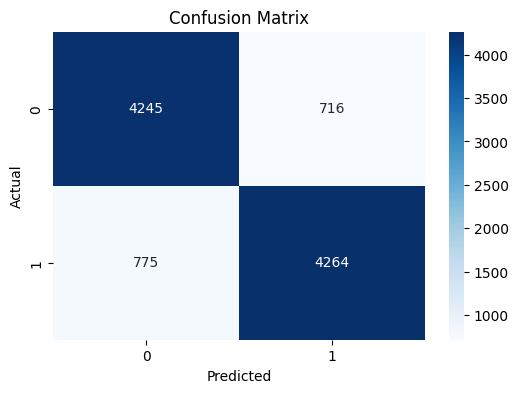

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Predict on test data
y_pred = model_nb.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


## Conclusion

In this project, we successfully built a sentiment analysis classifier for IMDB movie reviews using traditional machine learning models. Naive Bayes Classifier has been used to classify reviews, and the results have been visualised with confusion matrices and other evaluation metrics. While deep learning methods like LSTM may yield better results, these simpler models are highly interpretable and efficient for smaller datasets.
